<div style='text-align: center; font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;'>
  <span style='font-size: 40px;'>🚀</span>
  <span style='font-weight: normal; font-size: 32px; color: #3366FF;'>Desafio Paraná Banco -</span>
  <span style='font-weight: bold; font-size: 32px; color: #3366FF;'> Cientista de Dados Pleno</span>
</div>
<div style='text-align: center; font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;'>
  <span style='font-weight: normal; font-size: 19px; color: #F;'>Etapa 2: Analise Exploratória</span>
</div>

<br><br>

<div style='color: #3366FF; text-align: center; font-size: 28px; font-weight: bold'>
  <p>
    Conteúdo desse Notebook
  </p>
</div>
<div style='text-align: center; font-size: 20px;'>
  <span style='font-size: 20px;'>✅</span>
  <span>Apresentação das Distribuições</p>
</div>
<div style='text-align: center; font-size: 20px;'>
  <span style='font-size: 20px;'>✅</span>
  <span>Análise das Correlações e Outliers</p>
</div>
<div style='text-align: center; font-size: 20px;'>
  <span style='font-size: 20px;'>✅</span>
  <span>Teste de K-S para avaliar distribuições</p>
</div>
<div style='text-align: center; font-size: 20px;'>
  <span style='font-size: 20px;'>✅</span>
  <span>Análise das séries temporais e Volumetria</p>
</div>
<div style='text-align: center; font-size: 20px;'>
  <span style='font-size: 20px;'>✅</span>
  <span>Análise PSI</p>
</div>

In [1]:
from utilities.components import data_processing as dp
from utilities.plottings import plotter as ptz
from matplotlib.cbook import boxplot_stats
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

import warnings
warnings.filterwarnings("ignore")

first_df = pd.read_csv('dados_operacoes.csv',sep=',')

# Criando um objeto para fazer os tratamentos do código mais modularizado
preprocessing = dp(df=first_df)

# df que utilizarei para resolver as tasks
df = preprocessing.check_na()
df.sort_values(by='data_operacao',inplace=True)

In [ ]:
df.describe()

In [2]:
df['idade'] = df.apply(lambda x: int(round(((x['data_operacao'] - x['nascimento']).days/365),0)) if str(x['idade']) == 'nan' else x['idade'],axis=1)
preprocessing.simple_fillna_per_id(df=df,col='genero')
preprocessing.simple_fillna_per_id(df=df,col='bairro')
preprocessing.simple_fillna_per_id(df=df,col='cidade')
preprocessing.simple_fillna_per_id(df=df,col='estado')
preprocessing.simple_fillna_per_id(df=df,col='cep')
preprocessing.simple_fillna_per_id(df=df,col='telefone')
preprocessing.simple_fillna_per_id(df=df,col='cartao')
preprocessing.simple_fillna_per_id(df=df,col='email')
preprocessing.simple_fillna_per_id(df=df,col='ocupacao')
preprocessing.simple_fillna_per_id(df=df,col='empregador')

In [3]:
df['bairro'] = df.apply(lambda x: x['bairro'].strip(), axis=1)
df['cidade'] = df.apply(lambda x: x['cidade'].strip(), axis=1)
df['estado'] = df.apply(lambda x: x['estado'].strip(), axis=1)

# Coletando o primeiro email quando possui dois registros
preprocessing.split_email(df=df)

# Podemos notar que Parcelas e Qtde de parcelas são iguais, asssim como parcelas pagas e quantidade de parcelas pagas
print((df['parcelas'] == df['quantidade_parcelas']).sum(),(df['parcelas_pagas'] == df['quantidade_parcelas_pagas']).sum())
df.drop(['parcelas','parcelas_pagas'],axis=1,inplace=True)
df['idade'] = df['idade'].astype('int')

14895 14895


<div style='text-align: center; font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;'>
  <span style='font-size: 30px;'>📊</span>
  <span style='font-weight: bold; font-size: 32px; color: #3366FF;'>Dist Variáveis Padrão</span>
</div>

Notei que algumas variáveis pareciam bem comunicativas, para testar a granularidade e o overlapping dos dados, decidi expandir a visualização da distribuições categorizando algumas variáveis que veremos na dist nested

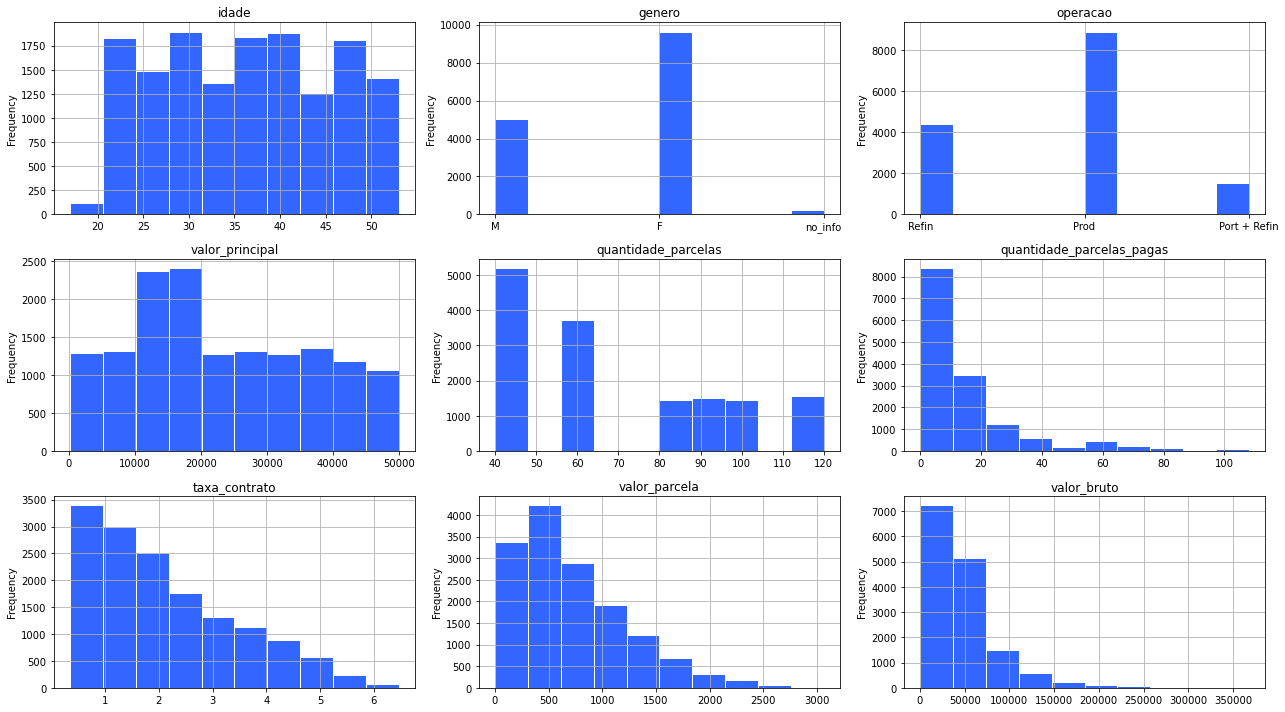

In [10]:
ptz.plotar_dist(df=df[['idade','genero','operacao','valor_principal',
                       'quantidade_parcelas','quantidade_parcelas_pagas','taxa_contrato',
                       'valor_parcela','valor_bruto']])

In [4]:
# Criando variáveis nested

df['idade_class'] = pd.cut(df['idade'], bins=[0,30,40,70], labels=['jovem','adulto','adulto_idoso'])
df['valor_parcela_class'] = pd.cut(df['valor_parcela'], bins=[0,720,1500,7000], labels=['abaixo','acima','muito_acima'])
df['valor_bruto_class'] = pd.cut(df['valor_bruto'], bins=[float('-inf'),50000,500000], labels=['abaixo','acima'])
df['valor_bruto_class'].astype('object').fillna('abaixo',inplace=True)
df['parcelas_pagas_class'] = pd.cut(df['quantidade_parcelas_pagas'], bins=[0,20,60,1000], labels=['abaixo','acima','muito_acima'],include_lowest=True)
df['parcelas_pagas_class'].astype('object').fillna('normal',inplace=True)
df['qtde_parcelas_class'] = pd.cut(df['quantidade_parcelas'], bins=[0,60,100,3000], labels=['normal','acima','muito_acima'])
df['mes_ano'] = df.apply(lambda x: str(x['data_operacao'].month) + '_' + str(x['data_operacao'].year),axis=1)
df['ano'] = df.apply(lambda x: str(x['data_operacao'].year),axis=1)
df['month'] = df.apply(lambda x: int(x['data_operacao'].month),axis=1)
df['month_class'] = pd.cut(df['month'], bins=[1,3,6,9,12], labels=['inicio','inicio_meio','meio_fim','fim'],include_lowest=True)


<div style='text-align: center; font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;'>
  <span style='font-size: 30px;'>📊</span>
  <span style='font-weight: bold; font-size: 32px; color: #3366FF;'>Dist Nested e Teste de Hipótese</span>
</div>

Para a testagem de algumas hipóteses, criei algumas variáveis e avaliei o desempenho dos histogramas dentro delas

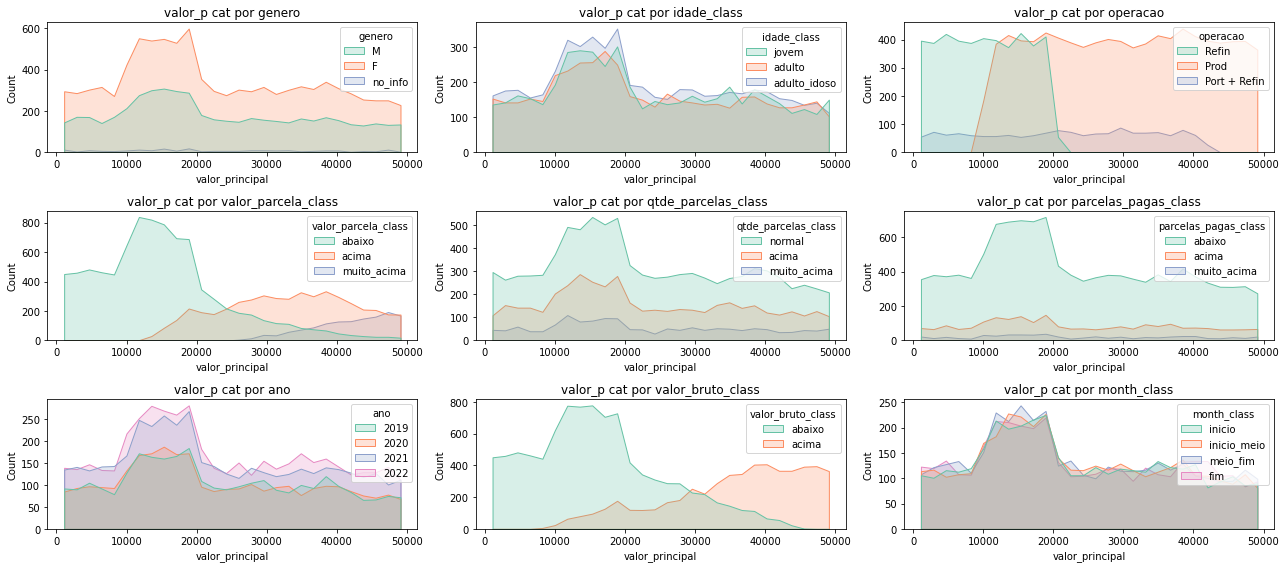

In [12]:
ptz.plotar_nested_dist(df=df,cols=['genero','idade_class','operacao',
                                   'valor_parcela_class','qtde_parcelas_class','parcelas_pagas_class',
                                   'ano','valor_bruto_class','month_class'])

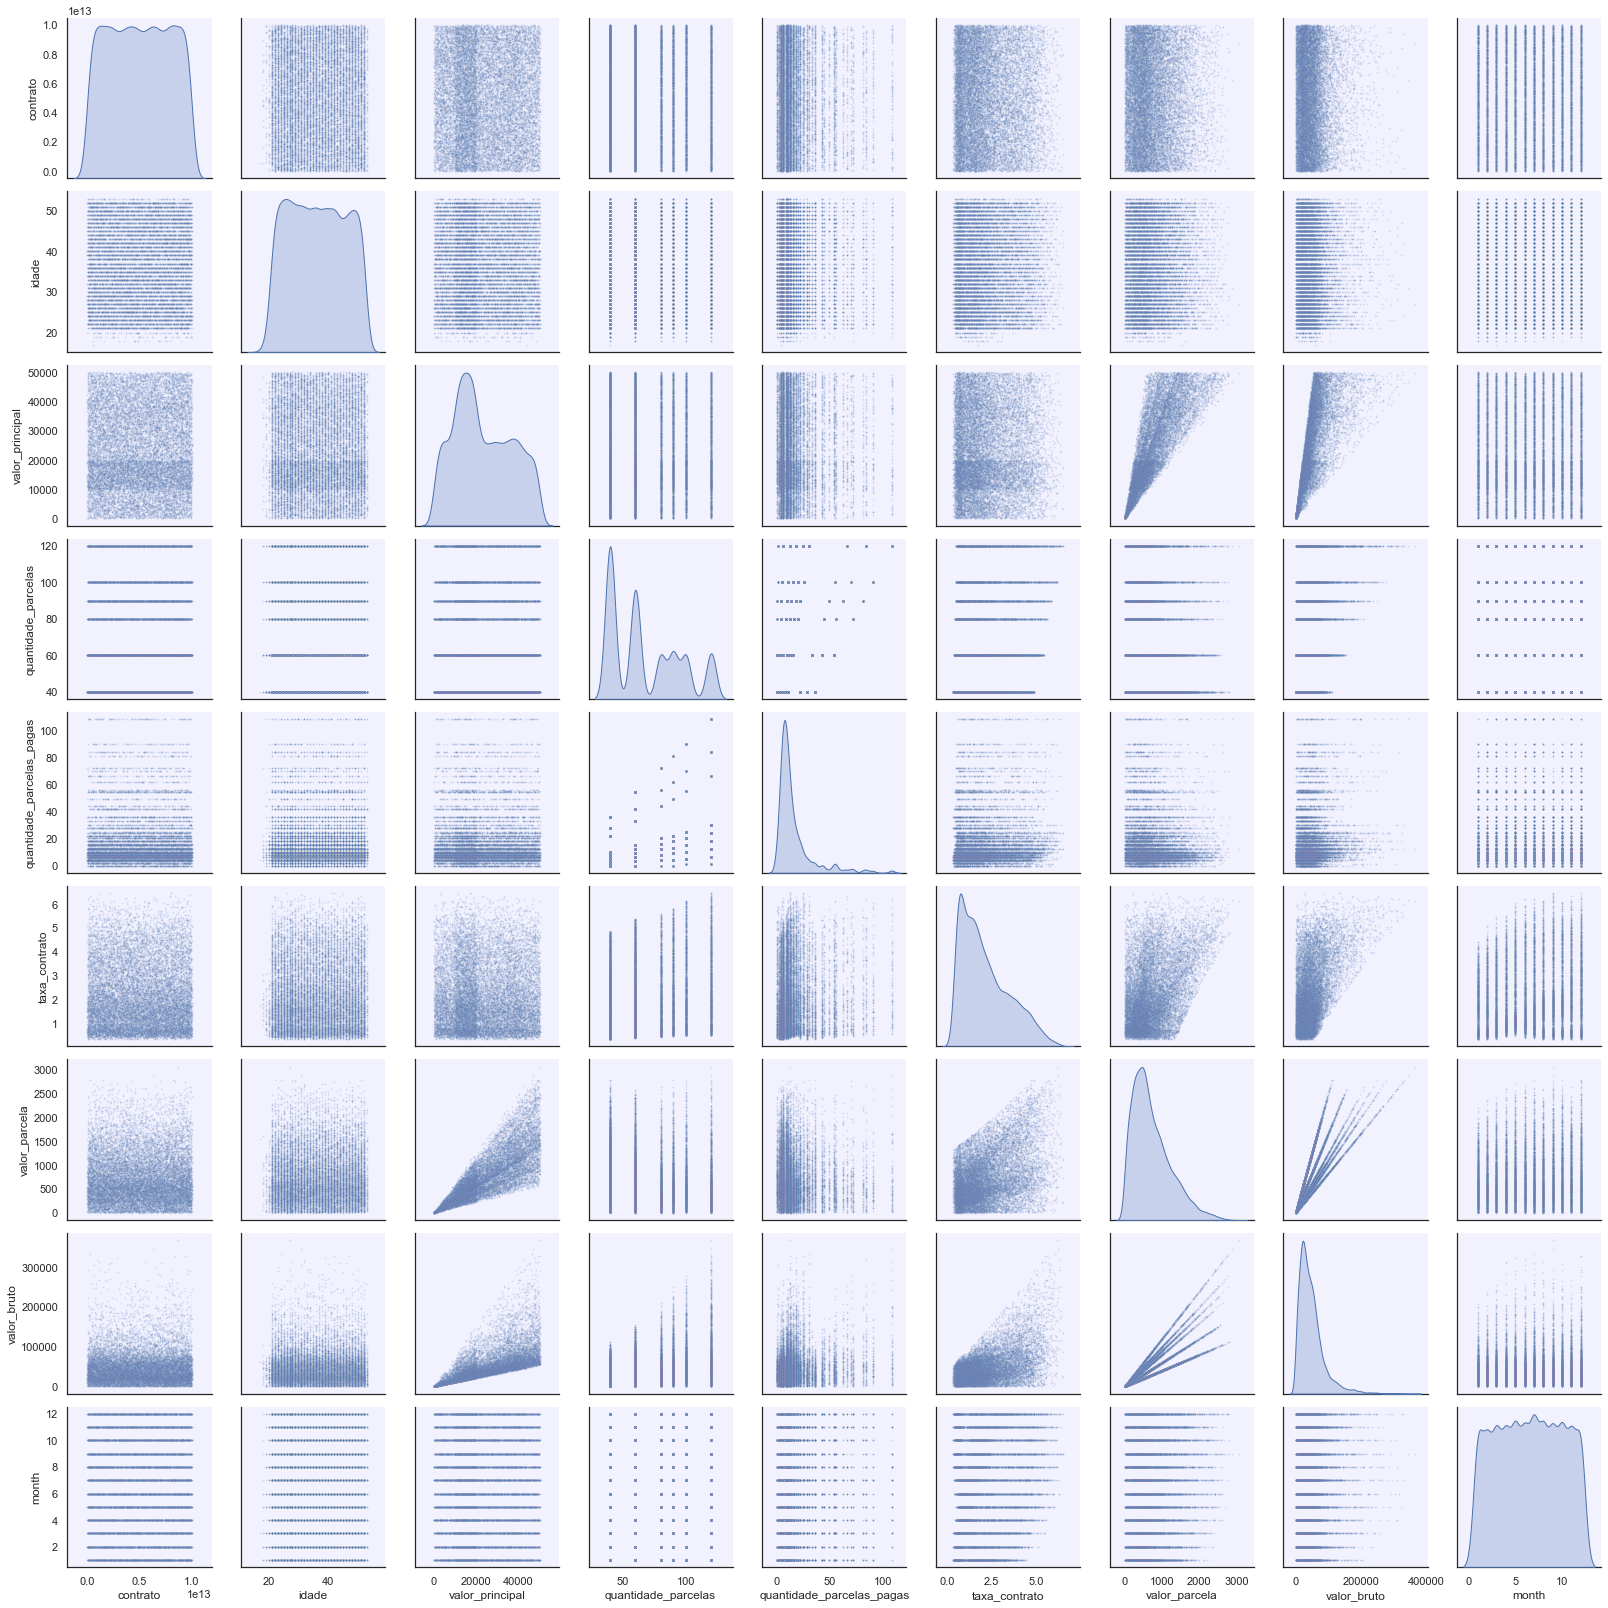

In [5]:
sns.set(style="white", rc={"axes.facecolor": (0.95, 0.95, 1.0)})
scatter_matrix = sns.pairplot(df, diag_kind='kde', plot_kws={'alpha': 0.2,"s":3})
plt.tight_layout()
plt.show()

In [5]:
ptz.ks_statistic(df=df,col='genero',value_1='F',value_2='M')
print('\n')
ptz.ks_statistic(df=df,col='operacao',value_1='Prod',value_2='Refin')
print('\n')
ptz.ks_statistic(df=df,col='valor_bruto_class',value_1='acima',value_2='abaixo')

Testando para a coluna genero, para os valores F e M
####################################################################
Não rejeitamos a hipótese nula: as distribuições não são diferentes
####################################################################


Testando para a coluna operacao, para os valores Prod e Refin
####################################################################
Não rejeitamos a hipótese nula: as distribuições não são diferentes
####################################################################


Testando para a coluna valor_bruto_class, para os valores acima e abaixo
####################################################################
Não rejeitamos a hipótese nula: as distribuições não são diferentes
####################################################################


<div style='text-align: center; font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;'>
  <span style='font-size: 30px;'>📊</span>
  <span style='font-weight: bold; font-size: 32px; color: #3366FF;'>Correlação Linear e Não Linear</span>
</div>

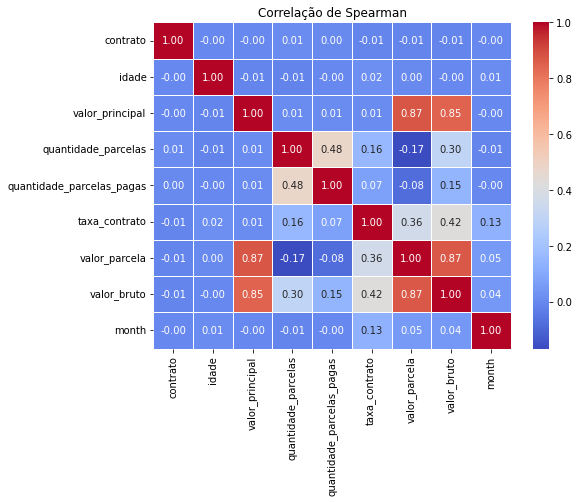

In [5]:
ptz.corrplot(df=df)

In [5]:
vif_df = df.select_dtypes(exclude=['object','category','datetime64[ns]'])
print(ptz.vif(df=vif_df))

                    features  VIF_Value
0                   contrato   3.705018
1                      idade   0.670218
2            valor_principal   8.020993
3        quantidade_parcelas   2.474674
4  quantidade_parcelas_pagas   1.145671
5              taxa_contrato   3.360531
6              valor_parcela  15.005907
7                valor_bruto   5.721710
8                      month   0.961953


<div style='text-align: center; font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;'>
  <span style='font-size: 30px;'>📊</span>
  <span style='font-weight: bold; font-size: 32px; color: #3366FF;'>Outliers e Deep Dive</span>
</div>

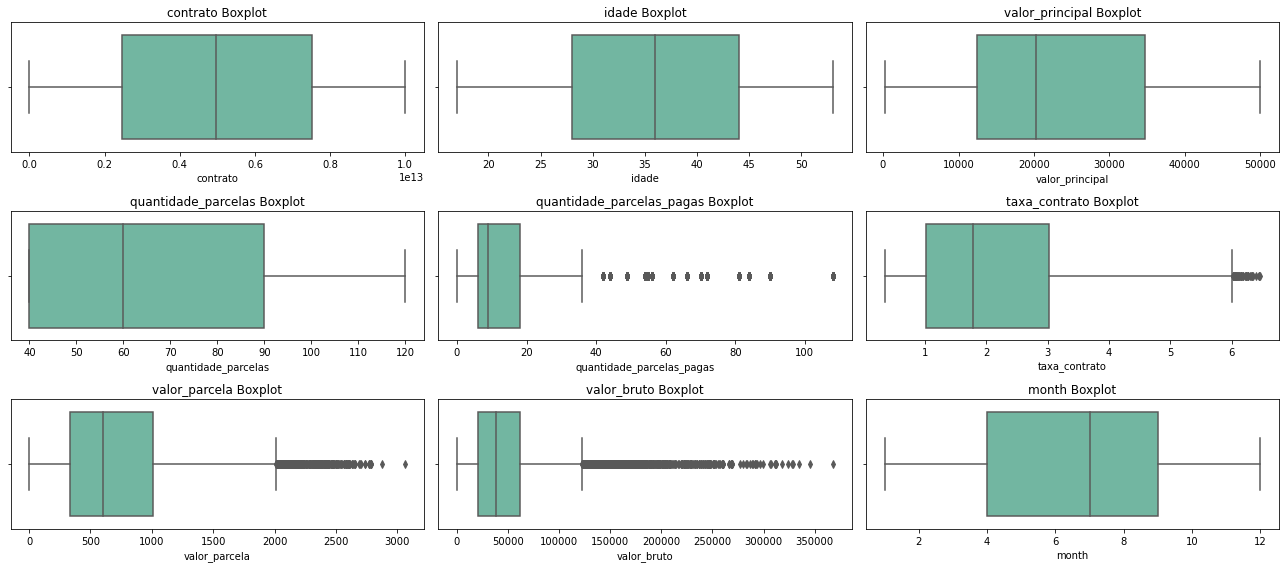

In [20]:
import warnings
warnings.filterwarnings("ignore")
outliers = ptz.plotar_nested_boxplot(df=df,cols=vif_df.columns)
outliers = outliers[['quantidade_parcelas_pagas','taxa_contrato','valor_parcela','valor_bruto']]

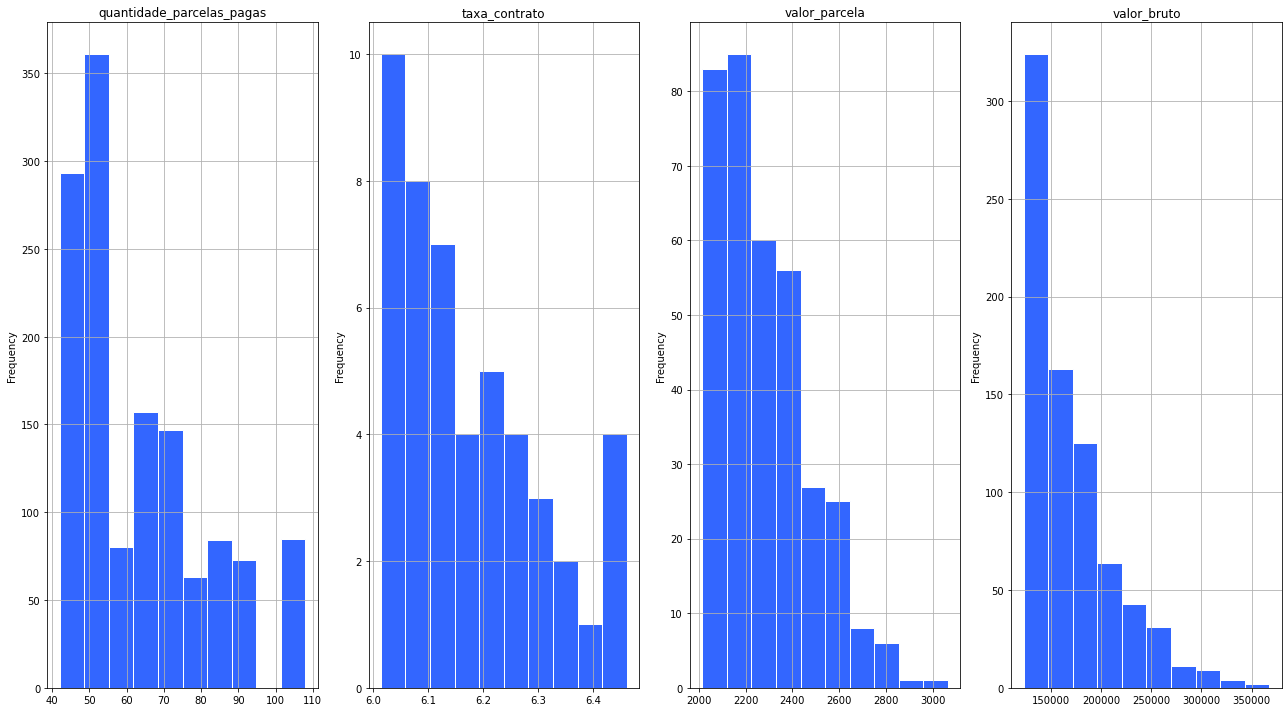

In [21]:
ptz.plotar_dist_four(df=outliers)

<div style='text-align: center; font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;'>
  <span style='font-size: 30px;'>📊</span>
  <span style='font-weight: bold; font-size: 32px; color: #3366FF;'>Séries Temporais e Volumetria</span>
</div>

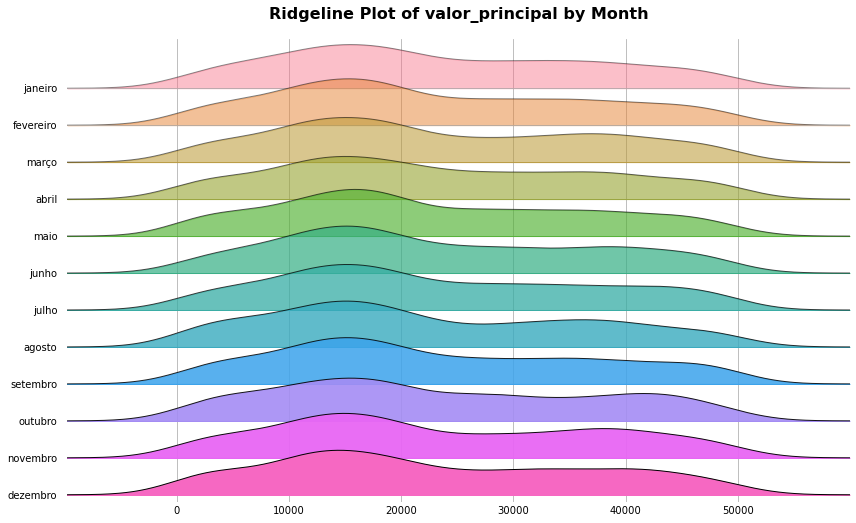

In [7]:
ptz.criar_ridge_grande(df=df)

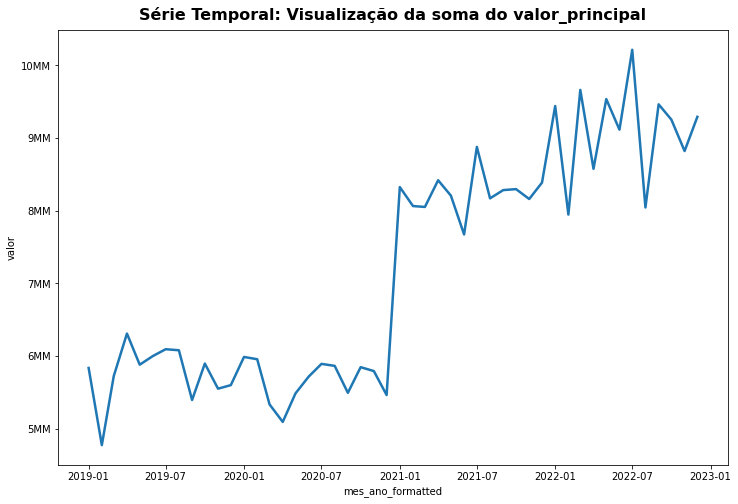

In [7]:
ptz.plotar_soma_linha_temporal(df=df)

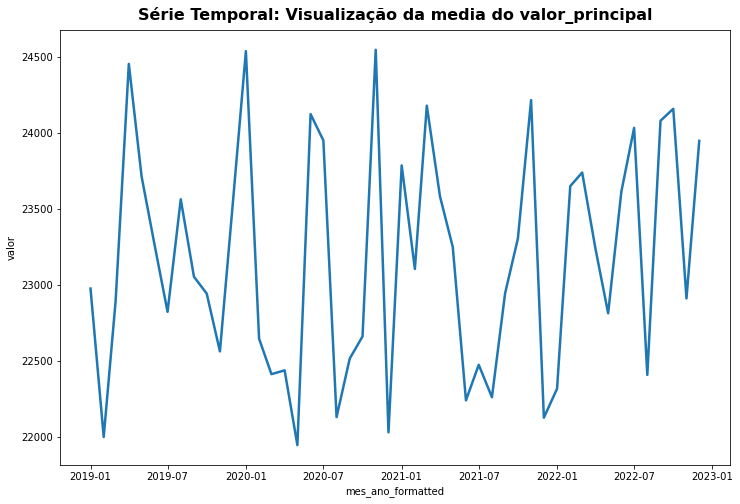

In [8]:
ptz.plotar_media_linha_temporal(df=df)

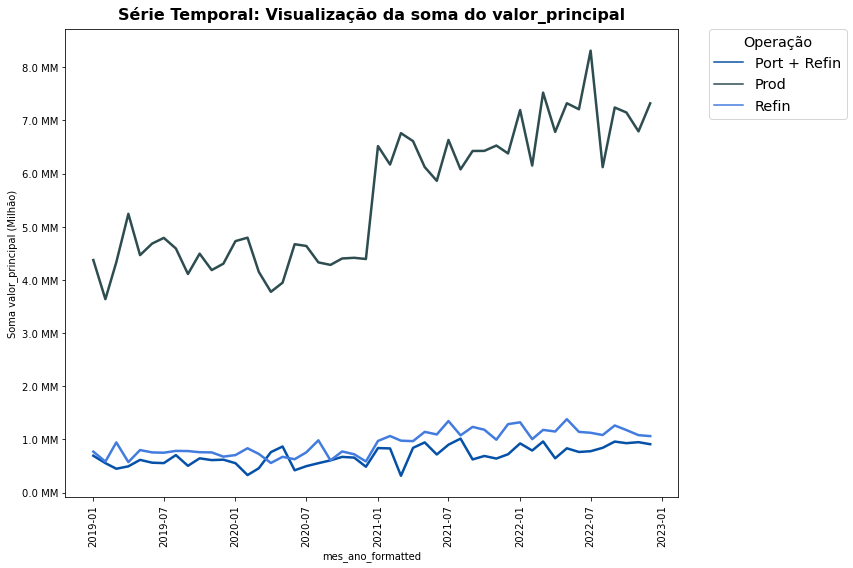

In [6]:
ptz.serie_acumulada_soma(df=df)

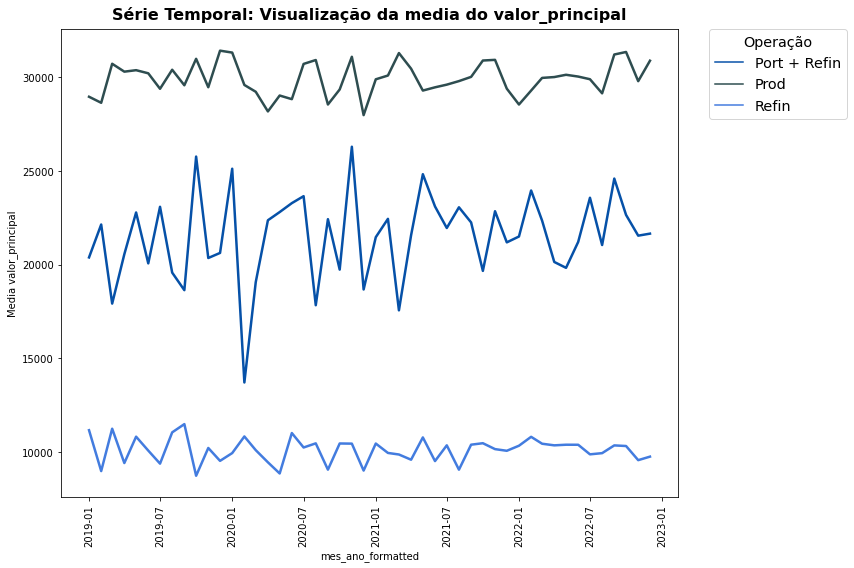

In [53]:
ptz.serie_acumulada_media(df=df)

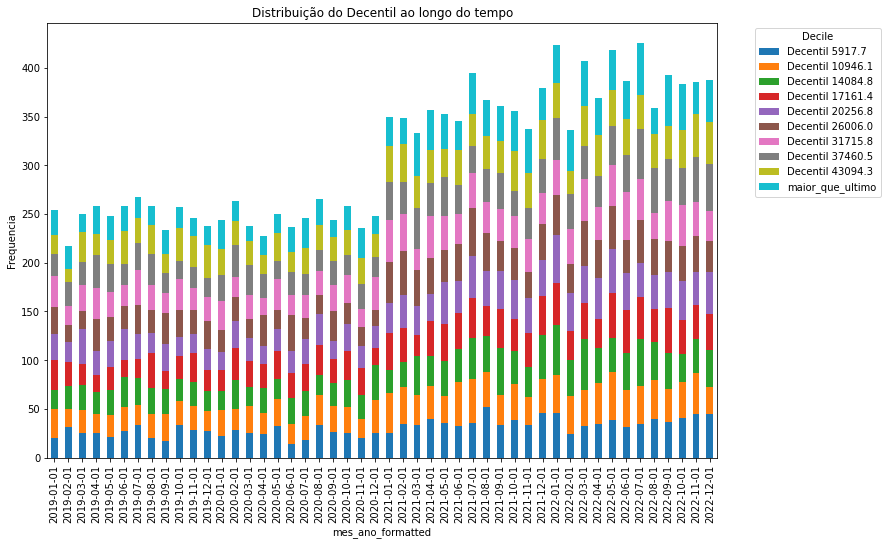

In [6]:
ptz.checar_volumetria(df=df)

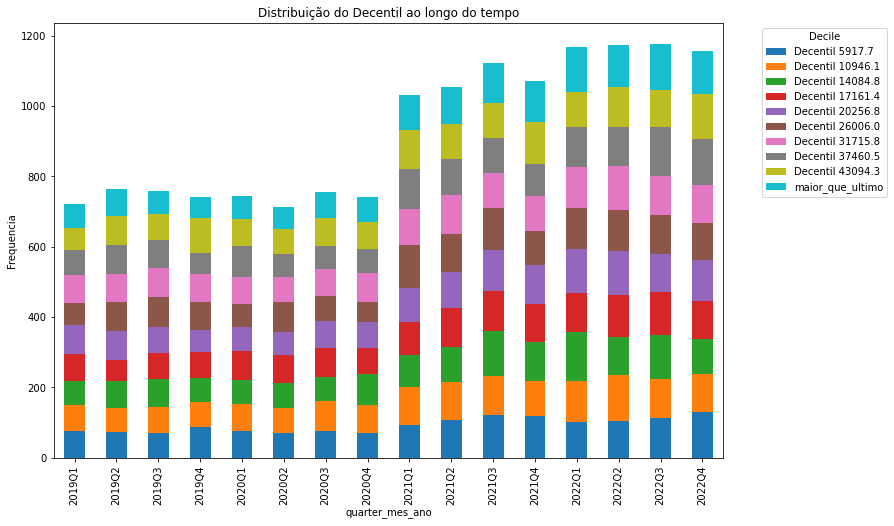

In [7]:
ptz.checar_volumetria_trimestre(df=df)

<div style='text-align: center; font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;'>
  <span style='font-size: 30px;'>📊</span>
  <span style='font-weight: bold; font-size: 32px; color: #3366FF;'>PSI</span>
</div>

In [5]:
df_2 = df[['idade','genero','estado','operacao','valor_principal',
    'quantidade_parcelas','quantidade_parcelas_pagas','taxa_contrato',
    'valor_parcela','valor_bruto','idade_class','valor_parcela_class',
    'valor_bruto_class','parcelas_pagas_class','qtde_parcelas_class']]

In [6]:
fit_ptz = ptz()
valores_finais_psi = pd.DataFrame()
i = 0
for col in df_2.columns:
    psi_values = fit_ptz.get_psi(df=df_2,variable=col,df_input=df)
    if i == 0:
        final_df = pd.concat([valores_finais_psi,psi_values])
    else:
        final_df = pd.concat([final_df,psi_values])

    i +=1

final_df[final_df['psi'] > 0.1]

,psi,quarter_cur,quarter_bas,variable
2,0.114367,2019Q4,2019Q3,idade
4,0.126987,2020Q2,2020Q1,idade
5,0.145026,2020Q3,2020Q2,idade
13,0.109102,2022Q3,2022Q2,idade
4,0.102874,2020Q2,2020Q1,estado
3,0.102321,2020Q1,2019Q4,quantidade_parcelas_pagas
4,0.110267,2020Q2,2020Q1,quantidade_parcelas_pagas
5,inf,2020Q3,2020Q2,valor_parcela_class
8,inf,2021Q2,2021Q1,valor_parcela_class
10,0.115896,2021Q4,2021Q3,valor_parcela_class
